# Last Week's Review

Before diving into this week's new material, we wanted to first take a step back and review what we learned last week since linear regression is a fundamental model within machine learning. We also wanted to go back and review some Tensorflow specifics.

Feedback: Thanks to all those who left feedback on last week's workshop! We did our best to carefully evaluate and see where we can improve. One of the main things we are trying out this workshop is to slow down with our explanations of code, have interactive coding sessions, and engage the audience more while lecturing in general. 

### Tensorflow Exercises

1) Import in Tensorflow (and alias it as tf) and Numpy (and alias it as np)

In [1]:
import tensorflow as tf
import numpy as np

2) Create a Tensorflow session and name it sess

In [2]:
sess = tf.InteractiveSession()

3) Create Tensorflow constants, model the expression 8 + (2*3), and print the output

In [3]:
a = tf.constant(8.0)
b = tf.constant(2.0)
c = tf.constant(3.0)
d = tf.multiply(b, c) # shortcut is just b * c
e = tf.add(a, d)
print(sess.run(e))

14.0


4) When we're creating our weight matrix W, what type of Tensorflow object would we want to create? A placeholder, a constant, or a variable? Once you know the answer, create it below. We want it to be of size 10 x 1 and we want to initialize it with 0.01 everywhere.

In [4]:
W = tf.Variable(tf.constant(0.01, shape=[10,1]))

5) What line(s) of code do we have to write to initialize our variables?

In [5]:
init = tf.global_variables_initializer() 
sess.run(init)

6) Print the values of what is inside W.

In [6]:
sess.run(W)

array([[ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01],
       [ 0.01]], dtype=float32)

7) Use placeholders to create an operation that gives the sum of the values passed into the placeholders. Then, in a session, run this operation and pass in the values (4.0, 5.0) to the placeholders.

In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder = a + b
sess.run(adder, feed_dict = {a: 4.0, b: 5.0})

9.0

# Matplotlib Exercises

In machine learning, it's often useful to visualize our data before applying algorithms to do it. By understanding our dataset, we may gain additional insight into what methods may work or not work, understand which features are more important than others, and view the relationships of features to each other (in order to detect correlation of features). While visualizing high dimensional feature spaces is tricky, we can use Matplotlib to understand the basics of feature visualization.

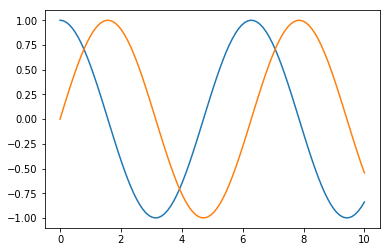

In [20]:
from matplotlib import pyplot as plt
X = np.linspace(0, 10, 100) # returns 100 evenly spaced numbers betweeen 0 and 100
cosines, sines = np.cos(X), np.sin(X)
plt.plot(X, cosines)
plt.plot(X, sines)
plt.show()

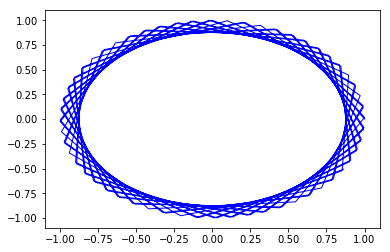

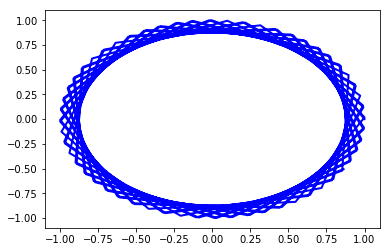

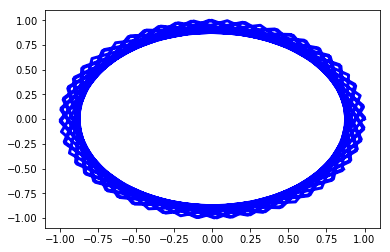

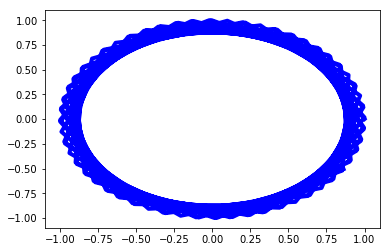

In [26]:
NUM_FIGURES = 4
for i in range(NUM_FIGURES):
    plt.figure(i)
    plt.plot(cosines, sines, color="blue", linewidth=i+1, linestyle="-")
plt.show()

### Showing Bar Plots

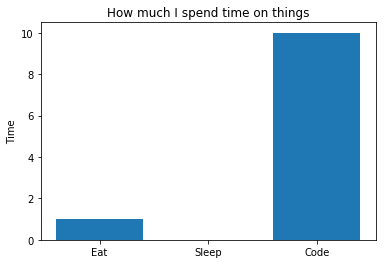

In [25]:
objects = ('Eat', 'Sleep', 'Code')
performance = [1,0,10]
 
plt.bar(range(len(performance)) , performance)
plt.xticks(range(len(performance)), objects)
plt.ylabel('Time')
plt.title('How much I spend time on things')
plt.show()

### Showing a picture (From scikit learn)

In [26]:
from sklearn import datasets
digits = datasets.load_digits()

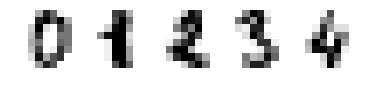

In [45]:
first_five_images = digits.images[:5]
# first_five_images holds 5 images. Each image is of dimension 8 * 8. 
# the enumerate keyword basically gives us the index and the value (in this case the image) at that index!
for i, image in enumerate(first_five_images):
    plt.subplot(1, 5, i + 1) # Plotting 1 row of NUM_FIGURES.
    plt.axis('off') # Uncomment this to plot with axes.
    plt.imshow(image, cmap=plt.cm.gray_r) # since MNIST is in grayscale.
plt.show()

### Review: Machine Learning Basics and Linear Regression

- We have a set of training pairs $$ (x_1, y_1), (x_2, y_2), ... (x_n, y_n) $$ which is our dataset. Examples include X being handwritten digits and y being the corresponding digit, X being a set of features that describe a house and y being the house price, or X being a set of restaurant reviews and y being the sentiment (positive or negative) of the review. 
- Computers can't work directly with the data in the same format that humans read it. For example, images are represented as a matrix of pixel values. Qualities describe a house (such as its neighborhood) are expressed numerically (by setting 1 = neighborhood1, 2 = neighborhood2, etc). 
- It's important to keep track of how you're representing your inputs! This should be done in a consistent manner so that it's easy to convert back and forth, and other users can understand your work.

### Crux of Supervised Machine Learning: Learning a function
- Given some data, we wish to learn a function that maps inputs to outputs. 
- If y is real-valued, we're dealing with a regression problem, otherwise we're dealing with a classification problem.
- Example to distinguish between the two: predicting the temperature tomorrow given weather data (real-valued outputs, regression problem) vs predicting whether it will rain tomorrow or not given weather data (discrete outputs, classification problem). 
- **Learning is about generalizing from the training data that we have.**

### Loss functions
- Given a function $ f: X \rightarrow Y $, we want to evaluate how well it is doing. 
- Example loss function: just take the squared difference: $ L_i = (f(x_i) - y_i)^2 $
- If we make predictions across the entire training set, we end up with a total loss $ L = \sum_{i = 1}^{N} L_i = \sum_{i = 1}^{N} (f(x_i) - y_i)^2 $
- Assumption: If we can minimize this loss, then we have learned a good function that can accurately predict inputs from outputs. 
    - Is this true? What are arguments for and against this assumption? Think about what we're really interested in with machine learning, and how the value of this loss relates to that. 

### Linear Regression
- Linear regression is one model that we can use when dealing with real-valued outputs. 
- Fundamental assumption: model our output ($y_i$) as a ** linear combination ** of our inputs. 
- Example: We want to learn a function $y_i = f(x_i) = wx_i$ where $ w $ is some parameter that we must come up with. We have the following dataset: $(1, 2.5), (2, 4.5), (5, 10.5)$. What is a sensible parameter choice for $w$? Given this parameter choice, what loss (using the sum of squared losses function given above) do you get? 

### Generalizing the idea of linear regression
- In general, each of our puts, $x$, will be a vector of features as opposed to a single numerical value. If each vector has size $n$, then we will need to learn a set of $n$ parameters, or weights - one for each feature. We also need a **bias unit**, which will allow our model to not necessarily have to pass through the origin, which is useful t fit data that does not pass through the origin. 
- Our function is now $f(x_i) = w_1*x_1 + w_2*x_2 + ... w_n*x_n = \sum_{i = 1}^{N}w_ix_i $. We can also compactly write this as a vector-vector multiplication where $W$ is our vector of weights and $x$ is our vector of features: $f(x_i) = Wx_i$.
- As you can probably guess, it is extremely impractical to set the weights manually! We were able to get a good approximation of the weight for the single dimension case, but in practice there can be up to millions of training examples and thousands of features. We want our machine learning model to learn the weights. 

### Learning a good setting of weight parameters
- Core idea: initialize the weights randomly. See how bad our loss is. Adjust our weights based on the value of our loss, and how much each weight affects it.
- We learn our weights with **gradient descent**: take partial derivatives of our loss with respect to our weights. This tells us the rate of change of the loss with respect to that particular weight, or how much that weight contributed to our loss. We adjust our weight based on this value. 
    

### Exercise: Code up a basic linear regression model